In [127]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [129]:
df.shape

(48895, 16)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [131]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [132]:
df.drop(["id","host_id","name","host_name","last_review"],axis=1,inplace=True)

In [133]:
df.head(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [136]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

df.reviews_per_month.isnull().sum()

0

In [137]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [138]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [139]:
len(df["neighbourhood"].unique())

221

In [140]:
ngs=df["neighbourhood_group"].unique()

In [141]:
for ng in ngs:
    print(ng)
    temp=df[df["neighbourhood_group"]==ng]
    
    print(temp.groupby("neighbourhood")["price"].mean().head())
    
    print("--------------------------------------------------")

Brooklyn
neighbourhood
Bath Beach             81.764706
Bay Ridge             144.432624
Bedford-Stuyvesant    107.678244
Bensonhurst            75.786667
Bergen Beach          106.700000
Name: price, dtype: float64
--------------------------------------------------
Manhattan
neighbourhood
Battery Park City    367.557143
Chelsea              249.738544
Chinatown            161.497283
Civic Center         191.942308
East Harlem          133.198747
Name: price, dtype: float64
--------------------------------------------------
Queens
neighbourhood
Arverne        171.779221
Astoria        117.187778
Bay Terrace    142.000000
Bayside        157.948718
Bayswater       87.470588
Name: price, dtype: float64
--------------------------------------------------
Staten Island
neighbourhood
Arden Heights                  67.250000
Arrochar                      115.000000
Bay Terrace, Staten Island    102.500000
Bull's Head                    47.333333
Castleton Corners             139.750000
Name: p

In [142]:
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


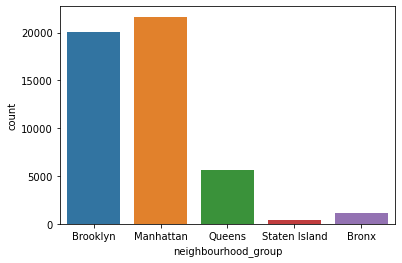

In [143]:
plt.figure()
sns.countplot(df["neighbourhood_group"])
plt.show()

In [144]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

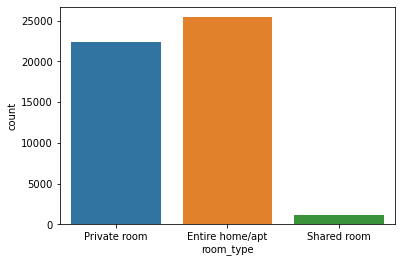

In [145]:
plt.figure()
sns.countplot(df["room_type"])
plt.show()

We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

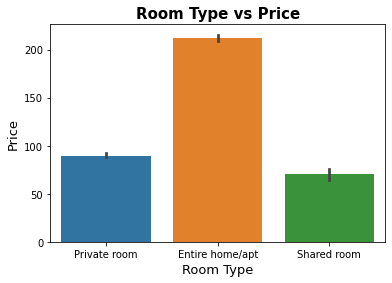

In [146]:
plt.figure()
sns.barplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')
plt.show()

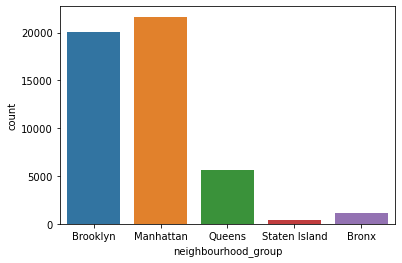

In [147]:
plt.figure()
sns.countplot(df["neighbourhood_group"])
plt.show()

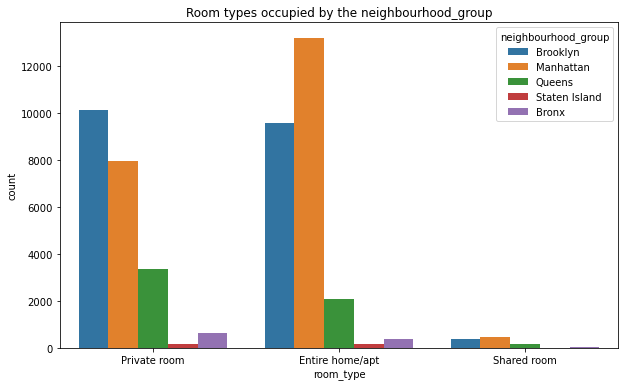

In [148]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

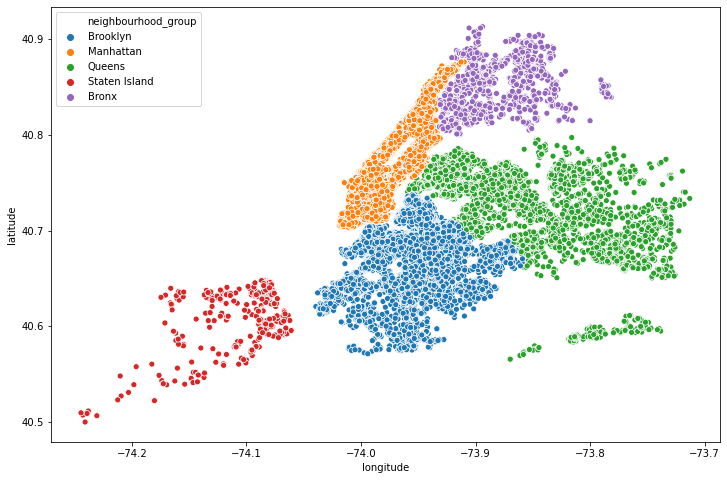

In [149]:
plt.figure(figsize=(12,8))
sns.scatterplot(df["longitude"],df["latitude"],hue=df["neighbourhood_group"])
plt.show()

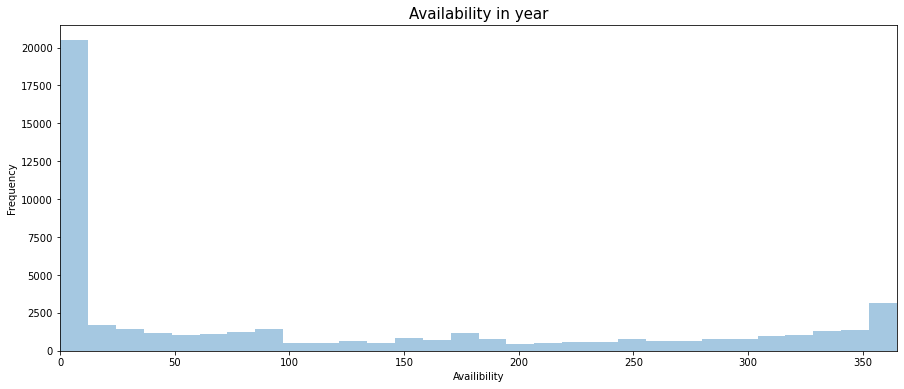

In [150]:
plt.figure(figsize=(15,6))
sns.distplot(df.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")
plt.show()

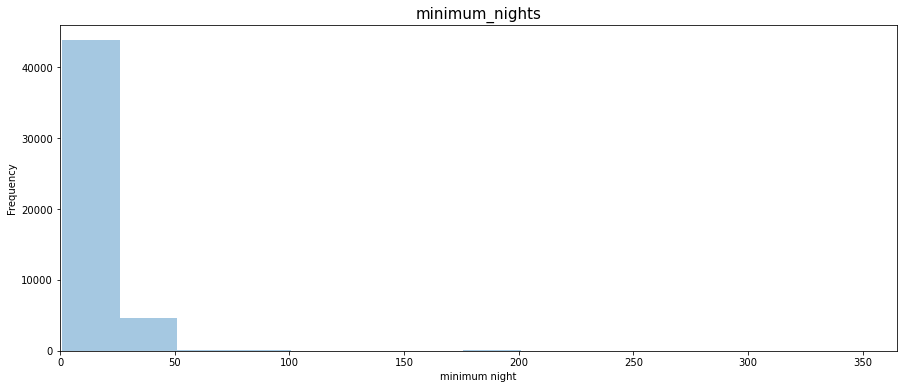

In [151]:
plt.figure(figsize=(15,6))
sns.distplot(df.minimum_nights, kde=False)
plt.xlim(0,365)
plt.title('minimum_nights', fontsize=15)
plt.xlabel('minimum night')
plt.ylabel("Frequency")
plt.show()

Bhavana Part:-

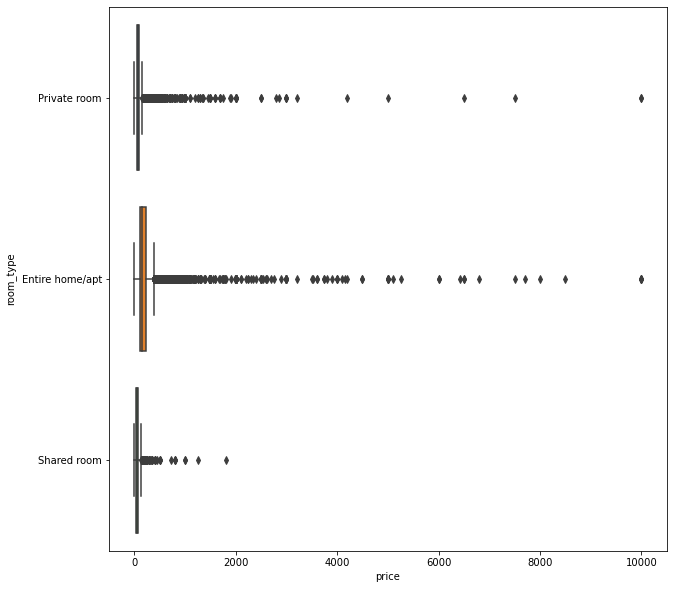

In [158]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="price",y="room_type")
plt.show()

Text(0.5, 1.0, 'Price Distribution Plot')

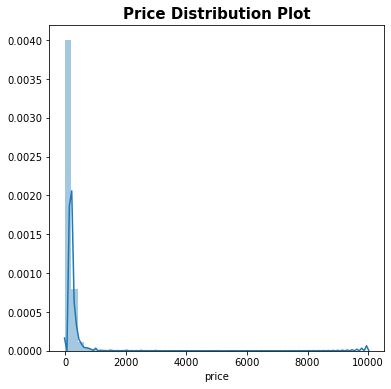

In [165]:
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, (log+0.01) transformation would be better.

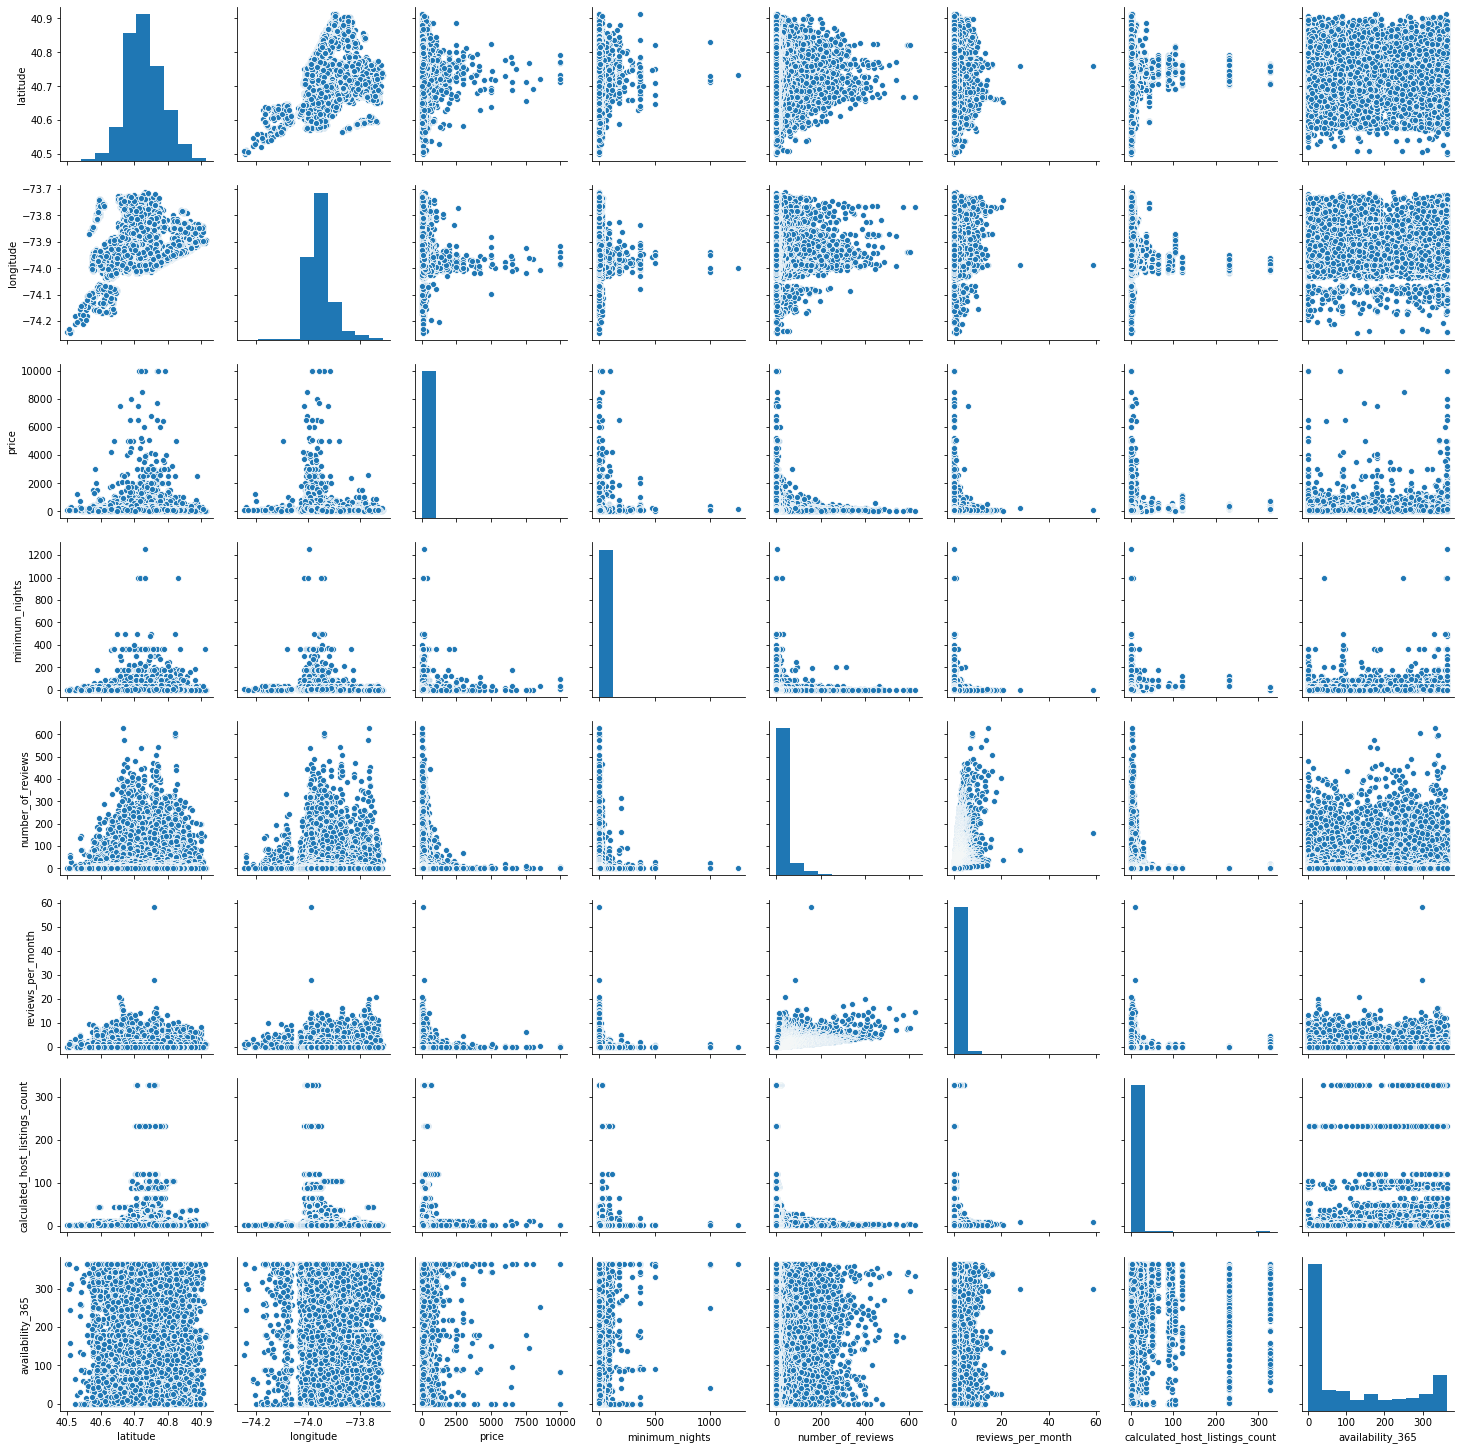

In [166]:
sns.pairplot(data=df)
plt.show()

In [167]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [168]:
len(df["price"].unique())

674

In [169]:
df.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [170]:
print(len(df[df["price"]==0]))
print(len(df[df["availability_365"]==0]))
print(len(df[df["minimum_nights"]==0]))

11
17533
0


In [171]:
df=df[df["price"]>0]
df=df[df["availability_365"]>0]    

In [172]:
# Reducing Skewness
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

latitude : 0.18024052928597142


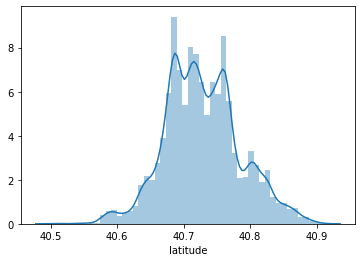

----------------------------
longitude : 1.1412012489409198


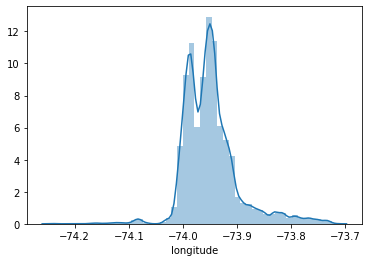

----------------------------
price : 17.0409828499352


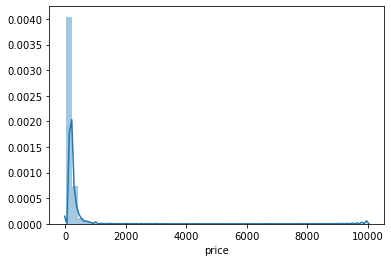

----------------------------
minimum_nights : 20.260804477196782


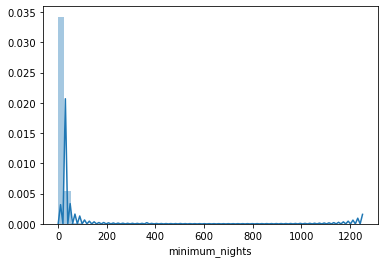

----------------------------
number_of_reviews : 3.0403686404897803


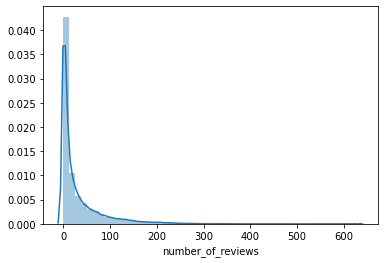

----------------------------
reviews_per_month : 2.9430812171538445


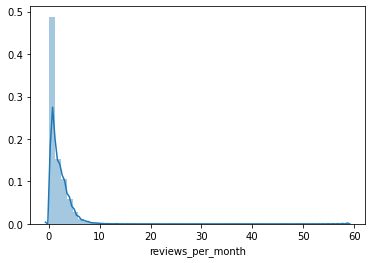

----------------------------
calculated_host_listings_count : 6.321204141073078


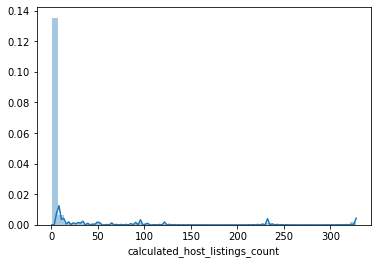

----------------------------
availability_365 : 0.1260266129975274


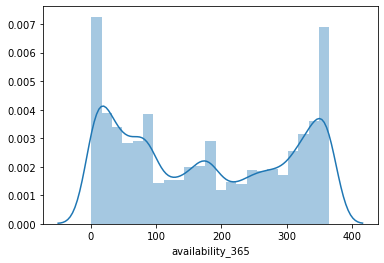

----------------------------


In [173]:
from scipy.stats import skew
for col in df_num:
  print(col, ":", skew(df_num[col]))
  sns.distplot(df_num[col])
  plt.show()
  print("----------------------------")

+ve skewed:- longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365

In [174]:
df_num["minimum_nights"]=np.sqrt(df_num["minimum_nights"])
df_num["minimum_nights"].skew()

3.531970728057008

In [175]:
df_num["minimum_nights"]=np.cbrt(df_num["minimum_nights"])
df_num["minimum_nights"].skew()

1.4657500378416053

In [176]:
df_num["number_of_reviews"]=np.sqrt(df_num["number_of_reviews"])
df_num["number_of_reviews"].skew()

1.127409537915209

In [177]:
df_num["number_of_reviews"]=np.cbrt(df_num["number_of_reviews"])
df_num["number_of_reviews"].skew()

-0.765163403666098

In [178]:
df_num["reviews_per_month"]=np.sqrt(df_num["reviews_per_month"])
df_num["reviews_per_month"].skew()

0.40998839070181664

In [179]:
#df_num["reviews_per_month"]=np.cbrt(df_num["reviews_per_month"])
#df_num["reviews_per_month"].skew()

In [180]:
df_num["availability_365"]=np.sqrt(df_num["availability_365"])
df_num["availability_365"].skew()

-0.3435162550460045

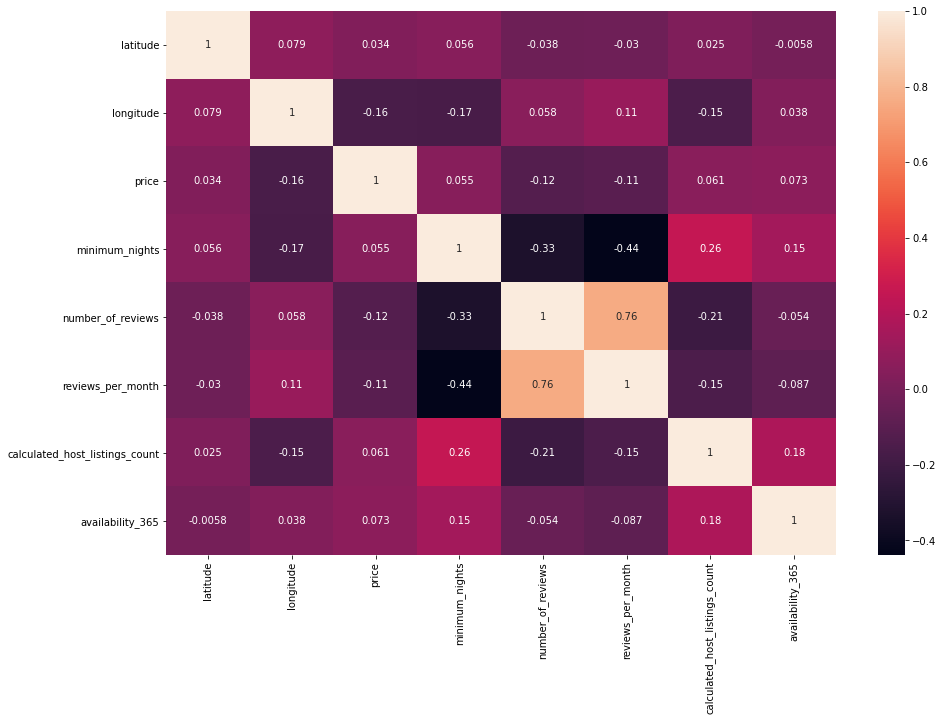

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [182]:
from sklearn.preprocessing import MinMaxScaler
for col in df_num:
    mm=MinMaxScaler()
    df_num[col]=mm.fit_transform(df_num[[col]])
    
df_num.head()  

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.357393,0.511921,0.013914,0.000000,0.492718,0.059914,0.015337,1.000000
1,0.614199,0.490469,0.021522,0.000000,0.644308,0.080596,0.003067,0.985444
2,0.748252,0.569257,0.014014,0.088049,0.000000,0.000000,0.000000,1.000000
3,0.448496,0.535649,0.007908,0.000000,0.868531,0.281631,0.000000,0.714079
5,0.599802,0.506972,0.019019,0.088049,0.699998,0.100426,0.000000,0.572098


In [183]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

df_cat.head(10)

,neighbourhood_group,neighbourhood,room_type
0,1,107,1
1,2,126,0
2,2,93,1
3,1,40,0
5,2,136,0
7,2,94,1
9,2,34,0
10,2,200,0
11,2,94,1
12,1,180,1


In [184]:
df_new=pd.concat([df_cat,df_num],axis=1)


In [185]:
df_new.head()

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,107,1,0.357393,0.511921,0.013914,0.000000,0.492718,0.059914,0.015337,1.000000
1,2,126,0,0.614199,0.490469,0.021522,0.000000,0.644308,0.080596,0.003067,0.985444
2,2,93,1,0.748252,0.569257,0.014014,0.088049,0.000000,0.000000,0.000000,1.000000
3,1,40,0,0.448496,0.535649,0.007908,0.000000,0.868531,0.281631,0.000000,0.714079
5,2,136,0,0.599802,0.506972,0.019019,0.088049,0.699998,0.100426,0.000000,0.572098


In [191]:
x=df_new.drop(["price","reviews_per_month"],axis=1)
y=df_new["price"]

y=np.log(df_new["price"]+0.01)
print(y)


0       -3.733295
1       -3.457085
2       -3.729118
3       -4.022513
5       -3.539804
           ...   
48890   -4.134791
48891   -4.342575
48892   -3.886818
48893   -4.233296
48894   -4.016939
Name: price, Length: 31354, dtype: float64


In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [195]:
print(lr.intercept_)
print(lr.coef_)

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

print("""slope={}
intercept={}
bias={}
variance={}""".format(lr.coef_,lr.intercept_,lr.score(x_train,y_train),lr.score(x_test,y_test)))

-3.118306690818324
[ 2.10656603e-02  3.33765721e-04 -4.35679311e-01  2.52570346e-01
 -1.07434090e+00 -5.72927759e-01 -3.10779306e-01  5.79065531e-02
  1.87709828e-01]
mse: 0.10749062997459254, rmse: 0.32785763674892876, r2: 0.4247050496453768
slope=[ 2.10656603e-02  3.33765721e-04 -4.35679311e-01  2.52570346e-01
 -1.07434090e+00 -5.72927759e-01 -3.10779306e-01  5.79065531e-02
  1.87709828e-01]
intercept=-3.118306690818324
bias=0.4134597960740498
variance=0.4247050496453768


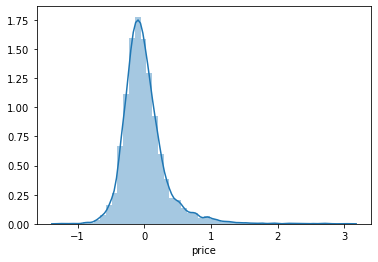

In [196]:
#y_hat=lr.predict(x_test)
residuals=y_test - y_pred

# print(y_hat)
sns.distplot(residuals)

#mimansa Part:-

In [197]:
from sklearn.linear_model import Lasso,Ridge

In [198]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
for i in alphas:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    print(i,"=",r.score(x_test,y_test))

1.0 = 0.4247263902713503
0.1 = 0.4247073976651491
0.01 = 0.42470528661006224
0.001 = 0.4247050733634957
0.0001 = 0.42470505201740516
0.0 = 0.4247050496453768


In [199]:
 alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
for i in alphas:
    r=Lasso(alpha=i)
    r.fit(x_train,y_train)
    print(i,"=",r.score(x_test,y_test))

1.0 = 0.01602690107452276
0.1 = 0.15351816386177952
0.01 = 0.34346185457118594
0.001 = 0.4224774969071572
0.0001 = 0.424697721834859
0.0 = 0.4247050496453767


In [200]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(lr,x,y,cv=5)

In [201]:
cross_val

array([0.37445829, 0.38689857, 0.3931357 , 0.45101371, 0.40704533])

In [202]:
np.mean(cross_val)

0.4025103190700291

In [203]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train_poly,y_train_poly)
y_pred=Ir.predict(x_test_poly)
print(mean_squared_error(y_test_poly,y_pred))
print("r2 score:",r2_score(y_test_poly,y_pred))



0.09028583113946717
r2 score: 0.5167859491066067


In [206]:
pf=PolynomialFeatures(4)

x_poly=pf.fit_transform(x)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train_poly,y_train_poly)
y_pred=Ir.predict(x_test_poly)
print(mean_squared_error(y_test_poly,y_pred))
print("r2 score:",r2_score(y_test_poly,y_pred))




0.08910887107915041
r2 score: 0.5230850951775652


In [209]:
pf=PolynomialFeatures(5)

x_poly=pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train,y_train)
y_pred=Ir.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))


0.18073583636138157
r2 score: 0.032693230736491774


In [210]:
from sklearn.feature_selection import SelectKBest,f_regression

In [211]:
annova = SelectKBest(score_func=f_regression, k=8)
fitted = annova.fit(x,y)
featurescores = pd.DataFrame(fitted.scores_, columns=['Score'])
featurescores['Columns'] = x.columns
print(featurescores)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

          Score                         Columns
0     73.173158             neighbourhood_group
1    562.890001                   neighbourhood
2  14101.367499                       room_type
3    151.302493                        latitude
4   3268.777734                       longitude
5    217.961996                  minimum_nights
6    714.400219               number_of_reviews
7    711.218512  calculated_host_listings_count
8    236.807585                availability_365


In [212]:
print(featurescores.nlargest(10, 'Score'))

          Score                         Columns
2  14101.367499                       room_type
4   3268.777734                       longitude
6    714.400219               number_of_reviews
7    711.218512  calculated_host_listings_count
1    562.890001                   neighbourhood
8    236.807585                availability_365
5    217.961996                  minimum_nights
3    151.302493                        latitude
0     73.173158             neighbourhood_group


In [213]:
x_train_annova = annova.transform(x_train)
x_test_annova = annova.transform(x_test)
lr_annova = LinearRegression()
lr_annova.fit(x_train_annova, y_train)
print(lr_annova.score(x_test_annova, y_test))

0.4094366138958182


In [214]:

for K in range(9, 2, -1):
    annova = SelectKBest(score_func=f_regression, k = K)
    annova.fit(x,y)
    x_train_annova = annova.transform(x_train)
    x_test_annova = annova.transform(x_test)
    lr_annova = LinearRegression()
    lr_annova.fit(x_train_annova, y_train)
    print(K, ":", lr_annova.score(x_test_annova, y_test))
    
    


9 : 0.41162681038286275
8 : 0.4094366138958182
7 : 0.4025536438984475
6 : 0.38538410970120274
5 : 0.37294911238004236
4 : 0.3694575606250904
3 : 0.3692822762123159


In [215]:
from sklearn.decomposition import PCA

In [216]:
##  using PCA with linear regression model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,random_state=1,test_size=0.3)
    lr = LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))

9 : 0.4247050496453768
8 : 0.36488284634275403
7 : 0.35718197593503354
6 : 0.35718927256702093
5 : 0.35597738121509914
4 : 0.3441633043101636
3 : 0.3277028907643077
2 : 0.017312861619132147


In [217]:
#using PCA with polynomial (degree=3) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=3)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,random_state=1,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    
    
    


9 : 0.5167859481989001
8 : 0.5000328564717118
7 : 0.48218176755555187
6 : 0.4551666598595415
5 : 0.4143133043061734
4 : 0.4058377670617952
3 : 0.38902958273177946
2 : 0.10617132530307183


In [218]:
#using PCA with polynomial (degree=4) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=4)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,random_state=1,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    

9 : 0.5237282275337534
8 : 0.5153426605956777
7 : 0.49876454516498336
6 : 0.4762562411067004
5 : 0.4413186546932475
4 : 0.4279637768161436
3 : 0.4140115279596406
2 : 0.13947078491059095


In [219]:
#using PCA with polynomial (degree=5) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=5)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    

9 : 0.28924611385351573
8 : 0.4364151458607247
7 : 0.4737385576557186
6 : 0.47122206843172654
5 : 0.44930804464862795
4 : 0.42106241069616124
3 : 0.4050826692860102
2 : 0.14455008222939247


In [220]:
import xgboost as xgb
xgb.__version__

'1.2.0'

In [221]:
from xgboost import XGBRegressor

In [235]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 15, n_estimators = 100)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)    
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5513218865734268


In [236]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5473587322090221


In [224]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 15, n_estimators = 300)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5425400574130037


In [239]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20, metric="euclidean")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R2 score: {}".format(r2))

R2 score: 0.4912909345442664


In [247]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5442542475873743


In [248]:

rf_reg=RandomForestRegressor(n_estimators=500,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5693989299499664


In [249]:
rf_reg=RandomForestRegressor(n_estimators=700,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5421208836746298


In [250]:
rf_reg=RandomForestRegressor(n_estimators=1000,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.564440244967547


In [251]:
rf_reg=RandomForestRegressor(n_estimators=1200,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5544737878012409


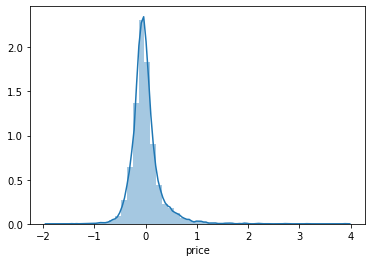

In [252]:
residuals=(y_test-y_pred)
sns.distplot(residuals)
plt.show()

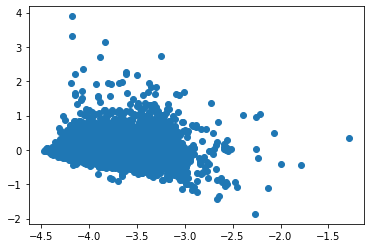

In [253]:
plt.figure()
plt.scatter(y_pred,residuals)
plt.show()

In [254]:
rf_reg=RandomForestRegressor(n_estimators=1400,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

0.5642455844165455
